In [2]:
using LinearAlgebra, Plots,Random, LaTeXStrings , ColorSchemes , Statistics

#### Diffrential Equations to solve

In [3]:
function Capacitor(a,b,t,y)
     ydot = a + y/b
    return ydot
end
function ocillator(w,x)
    accelarion =  -w*x
    return accelarion
end

function ocillatorEuler(w, t, y)
    yprime = y[2]
    y2prime = -w*y[1]

    return [yprime, y2prime]
    
end



ocillatorEuler (generic function with 1 method)

In [4]:
ocillatorEuler(1, [1.0, 0.0])

MethodError: MethodError: no method matching ocillatorEuler(::Int64, ::Vector{Float64})
Closest candidates are:
  ocillatorEuler(::Any, ::Any, !Matched::Any) at e:\Home\Sharif\8\Simulation\seies9\diffcalc.ipynb:10

#### Methods and Algorithms

Euler 


In [5]:
function EulerCalc(funct,initals, T1, T2, step)

    ylist = [initals]
    temp = initals
    for i in T1:step:T2-step
        temp = temp .+ step.*funct(i,temp)
        push!(ylist, temp)
    end
    return ylist, collect(T1:step:T2)
    
end


EulerCalc (generic function with 1 method)

In [7]:
function UnreliableMethod(funct,initials, T1, T2, step)
    xlist = [initials]
    push!(xlist, initials .+ funct.(T1,xlist[1]).*step)
    
    for (i,t) in enumerate(T1:step:T2-2*step)
        push!(xlist, xlist[i] .+ 2 .* funct.(i,xlist[i+1]) .*step)
    end
    return xlist ,T1:step:T2
end

UnreliableMethod (generic function with 1 method)

Euler-Cromers


In [8]:
function EulerCromers(afunct , xinitials,vinitials, T1,T2,step)
    xlist = [xinitials]
    vlist = [vinitials]
    xtemp = xinitials
    vtemp = vinitials
    for i in T1:step:T2-step
        vtemp = vtemp .+ step .*afunct.(xtemp)
        xtemp = xtemp .+step .*vtemp
        push!(vlist,vtemp)
        push!(xlist,xtemp)
    end
    return xlist, [T1:step:T2], vlist
end


EulerCromers (generic function with 1 method)

Leapfrog

In [57]:
function LeapfrogCalc(afunct , xinitials,vinitials, T1,T2,step)
    xlist = [xinitials]
    vlist = [vinitials]
    xtemp = xinitials
    vtemp = vinitials
    for i in T1:step:T2-step
        xtemp = xtemp .+ step .*vtemp
        vtemp = vtemp .+ step .*afunct.(xtemp)
        push!(vlist,vtemp)
        push!(xlist , xtemp)
    end
    return xlist, collect([T1:step:T2]),vlist

end

LeapfrogCalc (generic function with 1 method)

Verlet

In [10]:
function Verlet(afunct , xinitials,vinitials, T1,T2,step)
    xlist = [xinitials]
    vlist = [vinitials]
    xtemp = xinitials
    vtemp = vinitials
    push!(xlist , xtemp .+ vtemp.* step + afunct.(xtemp)*(step^2)/2)
    for (i,t) in enumerate(T1:step:T2-2*step)
        xtemp=  2 .* xlist[i+1] .- xlist[i] .+ (step^2) .* afunct.(xlist[i])

        push!(xlist , xtemp)
    end
    return xlist , [T1:step:T2],vlist
end


Verlet (generic function with 1 method)

Velocity Verlet

In [11]:
function VelocityVerlet(afunct , xinitials,vinitials, T1,T2,step)
    xlist = [xinitials]
    vlist = [vinitials]
    xtemp = xinitials
    vtemp = vinitials
    for i in T1:step:T2-step
        vtemp = vtemp .+ 1/2 *step .*afunct.(xtemp)
        xtemp = xtemp .+ step .*vtemp
        vtemp = vtemp .+ 1/2 *step .*afunct.(xtemp)
        push!(vlist,vtemp)
        push!(xlist , xtemp)
    end
    return xlist, [T1:step:T2],vlist
end


VelocityVerlet (generic function with 1 method)

Beeman

In [12]:
function Beeman(afunct , xinitials,vinitials, T1,T2,step)
    xlist = [xinitials]
    vlist = [vinitials]
    xtemp = xinitials
    vtemp = vinitials
    push!(xlist , xtemp .+ vtemp.* step + afunct.(xtemp)*(step^2)/2)
    push!(vlist, vtemp .+ 1/2 *step .*afunct.(xtemp))
    for (i,t) in enumerate(T1+step:step:T2-step)
        xtemp = (xlist[i+1] + vlist[i+1] *step + 1/6 * (4*afunct.(xlist[i+1])-afunct.(xlist[i])) *(step^2))
        push!(xlist,xtemp)
        push!(vlist , (vlist[i+1] +1/6*(5afunct.(xlist[i+1]) + 2*afunct.(xlist[i+2])-afunct.(xlist[i]))*(step)) )
    end
    return xlist, [T1:step:T2],vlist
end

    

Beeman (generic function with 1 method)

#### Q1: capacitor

In [18]:
eulerdata = EulerCalc((t,y)-> Capacitor(1.0,-1.0,t,y) , [0.0] , 0.0,5.0,0.1)
UnreliableMethoddata = UnreliableMethod((t,y)-> Capacitor(1.0,-1.0,t,y) , [0.0] , 0.0,5.0,0.1)

eulercap = hcat(eulerdata[1]...)
UnreliableMethodcap = hcat(UnreliableMethoddata[1]...)


MethodError: MethodError: no method matching (::var"#31#32")(::Float64, ::Vector{Float64})
Closest candidates are:
  (::var"#31#32")(::Any) at e:\Home\Sharif\8\Simulation\seies9\diffcalc.ipynb:1

In [123]:
plot(eulerdata[2],eulercap', label = "Euler Method")
plot!(UnreliableMethoddata[2],UnreliableMethodcap', label = "Unreliable Method")
plot!(eulerdata[2],t->1-exp(-t), label ="Analytical Soultion")
plot!(xaxis = "t", yaxis = "y" , title = "Capacitor diffrential equation")
savefig("unstable")

"e:\\Home\\Sharif\\8\\Simulation\\seies9\\unstable.png"

accuracy

In [95]:
answerlists = []
errorlist = []
for i in 1:100
    EulerAccuracyData= EulerCalc((t,y)-> Capacitor(1.0,-1.0,t,y) , [0.0] , 0.0,5.0,i/100)
    push!(answerlists , EulerAccuracyData[1])
    push!(errorlist , sqrt(mean((hcat(EulerAccuracyData[1]...)' + exp.(-EulerAccuracyData[2] ).-1)).^2))
    # print(EulerAccuracyData)
end



In [124]:
plot(0.01:0.01:1 , errorlist)
plot!(xaxis = "step lenght",yaxis = "error" , title = "Euler Method Error for capacitor equation" , legend = false)
savefig("error")

"e:\\Home\\Sharif\\8\\Simulation\\seies9\\error.png"

#### Q2: Simple Harmonic Ocillator

In [14]:
eulerOdata = EulerCalc((t, x)-> ocillatorEuler(1.0, t, x) , [1.0, 0.0] , 0.0,10.0,0.1)
eulercromersdata = EulerCromers((x)-> ocillator(1.0,x) , [1.0],[0.0] , 0.0,10.0,0.1)
leapfrogdata = LeapfrogCalc((x)-> ocillator(1.0,x) , [1.0],[0.0] , 0.0,10.0,0.1)
VelocityVerletdata = VelocityVerlet((x)-> ocillator(1.0,x) , [1.0],[0.0] , 0.0,10.0,0.1)
Verletdata = Verlet((x)-> ocillator(1.0,x) , [1.0],[0.0] , 0.0,10.0,0.1)
beemandata = Beeman((x)-> ocillator(1.0,x) , [1.0],[0.0] , 0.0,10.0,0.1)

eulerocill = hcat(eulerOdata[1]...)
eulercromerocill = hcat(eulercromersdata[1]...)
leapfrogocill = hcat(leapfrogdata[1]...)
VelocityVerletocill = hcat(VelocityVerletdata[1]...)
verletocill = hcat(Verletdata[1]...)
beemanocill = hcat(beemandata[1]...)

1×101 Matrix{Float64}:
 1.0  0.995  0.985033  0.965216  0.935747  …  -0.942674  -0.905769  -0.859807

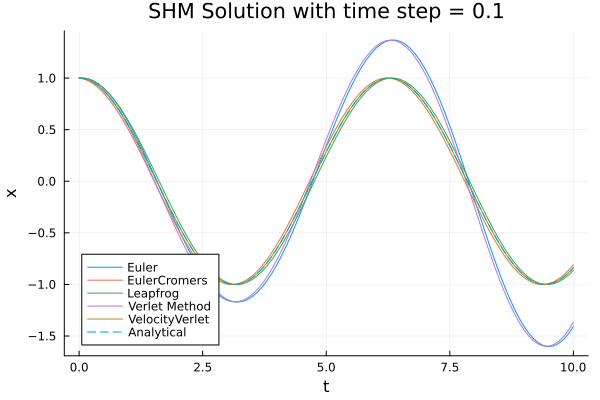

In [15]:

plot(eulerOdata[2],eulerocill[1,:], label = "Euler ")
plot!(eulercromersdata[2],eulercromerocill', label = "EulerCromers ")
plot!(leapfrogdata[2],leapfrogocill', label = "Leapfrog ")
plot!(Verletdata[2],verletocill', label = "Verlet Method")
plot!(VelocityVerletdata[2],VelocityVerletocill', label = "VelocityVerlet ")
plot!(xaxis= "t" , yaxis = "x" , title = "SHM Solution with time step = 0.1")
plot!(x->cos(x), ls = :dash, label = "Analytical ", legend= :bottomleft)
# savefig("all")



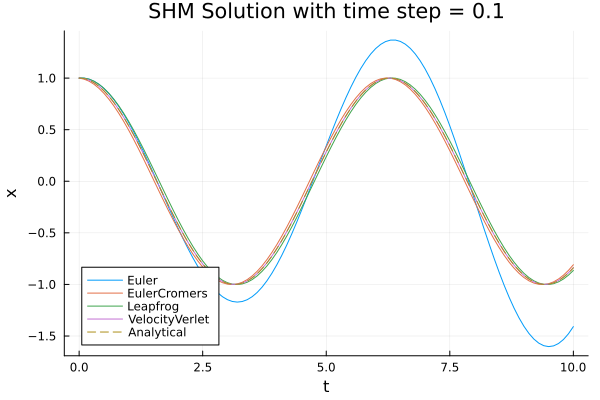

In [16]:
plot(eulerOdata[2],eulerocill[1,:], label = "Euler ")
plot!(eulercromersdata[2],eulercromerocill', label = "EulerCromers ")
plot!(leapfrogdata[2],leapfrogocill', label = "Leapfrog ")
plot!(VelocityVerletdata[2],VelocityVerletocill', label = "VelocityVerlet ")
plot!(xaxis= "t" , yaxis = "x" , title = "SHM Solution with time step = 0.1", legend = :bottomleft)

plot!(x->cos(x), ls = :dash, label = "Analytical ")
# savefig("graph")

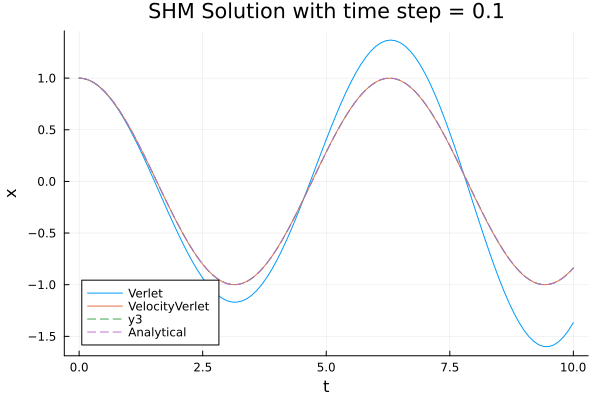

In [17]:
plot(Verletdata[2],verletocill', label = "Verlet ")
plot!(VelocityVerletdata[2],VelocityVerletocill', label = "VelocityVerlet ")

plot!(xaxis= "t" , yaxis = "x" , title = "SHM Solution with time step = 0.1")
plot!(x->cos(x), ls = :dash)

plot!(x->cos(x), ls = :dash, label = "Analytical ", legend = :bottomleft)
# savefig("verlet")

In [152]:

VelsVelVerlet = hcat(VelocityVerletdata[3]...)'
VelsVerlet =hcat(VelocityVerletdata[3]...)'
VelsBeeman= hcat(VelocityVerletdata[3]...)'
VelsLeapFrog =hcat(leapfrogdata[3]...)'
VerlsEuler = hcat(VelocityVerletdata[3]...)'
VelsEulerCromers =hcat(VelocityVerletdata[3]...)'


# plot!(VelocityVerletocill', VerlsEuler, label = )
plot(eulercromerocill', VelsEulerCromers, label = "EulerCromers " )
plot!(VelocityVerletocill', VelsVelVerlet, label ="VelocityVerlet " )
plot!(verletocill', VelsVerlet, label = "Verlet ")
plot!(beemanocill', VelsBeeman, label ="Beeman " )
plot!(cos.(0:0.1:2*π), sin.(0:0.1:2*π), ls = :dash , label = "Analytical")
plot!(leapfrogocill', VelsEulerCromers, label ="Leapfrog ", legend= :bottomleft )
plot!(xaxis= "x", yaxis = "p", title = "Phase space")
plot!(ratio = 1)

savefig("phase")

"e:\\Home\\Sharif\\8\\Simulation\\seies9\\phase.png"

Accuracy

In [74]:
function accuracy(method, funct, xinitials, vinitials, T1,T2)
    xerrorlist = []
    yerrorlist = []
    for i in 1:100
    solutions = method(( x-> funct(1.0, x)),xinitials,vinitials,T1,T2,i/100)
    xlist = hcat(solutions[1]...)'
    tlist = solutions[2]
    vlist = hcat(solutions[3]...)'
    push!(xerrorlist , sqrt(mean((xlist - cos.(tlist...))).^2))
    push!(yerrorlist , sqrt(mean((vlist - sin.(tlist...))).^2))
    end
    error = sqrt.(xerrorlist.^2 + yerrorlist.^2)
    return xerrorlist,yerrorlist, error
end



(Any[0.000913992214323765, 0.0018169188675889142, 0.0027195827898588666, 0.003589699498566603, 0.004459612230274, 0.005402831580721541, 0.006312300222041364, 0.007003765572884239, 0.00786178250142664, 0.008645459534401588  …  0.05634304772407846, 0.05432465709276018, 0.052185859208738354, 0.04997386315782342, 0.04773784692957495, 0.0455281354852149, 0.0433953360551194, 0.0413894425323198, 0.03955892174062282, 0.03794979513235509], Any[0.36689956484339703, 0.365978939788561, 0.3665196183061947, 0.36411959152500056, 0.3631806402679865, 0.3680980128728136, 0.37003369415913573, 0.36032526616344285, 0.3608655680028003, 0.35838836431388105  …  0.39408317639246326, 0.38114312032787123, 0.3660738374665083, 0.3490632575101657, 0.33032137879976486, 0.31007772662173955, 0.28857858460120595, 0.26608402650239826, 0.24286477831475423, 0.219198942838001], [0.3669007032754802, 0.36598344984839215, 0.36652970784626665, 0.3641372857519857, 0.36320801974448336, 0.3681376613034908, 0.3700875301157146, 0.3

In [79]:
ErrorLeapfrogCalc= accuracy(LeapfrogCalc,ocillator,[1.0],[0.0] , 0.0,10.0)
Errorvelocityverlet= accuracy(VelocityVerlet,ocillator,[1.0],[0.0] , 0.0,10.0)

(Any[3.2548117408367847e-6, 1.2960335511665554e-5, 2.926341741778087e-5, 5.1365856271477416e-5, 7.988426041278542e-5, 0.00011826341012357096, 0.00016274573242120442, 0.00020158736788615617, 0.00025608608960829896, 0.0003118910652678661  …  0.034027983090115906, 0.03299775672441527, 0.03147513061533427, 0.02945503317287865, 0.026939244499318612, 0.023936757146242424, 0.020464050733440306, 0.016545271208547985, 0.012212306373024596, 0.007504750322190354], Any[0.36689497860826686, 0.3659606409965301, 0.36647838561308554, 0.3640467702179039, 0.3630671528557195, 0.3679323800230885, 0.3698070675507297, 0.3600370520458121, 0.36050026391620377, 0.3579404967838976  …  0.3529643573720047, 0.34097480997197055, 0.3271714771983146, 0.3117316762347358, 0.29484976037104044, 0.27673457815864, 0.25760678200875453, 0.23769601676937296, 0.21723802039849885, 0.19647167011072827], [0.366894978622704, 0.3659606412260224, 0.36647838678143224, 0.3640467738416844, 0.3630671616440317, 0.367932399029616, 0.36980

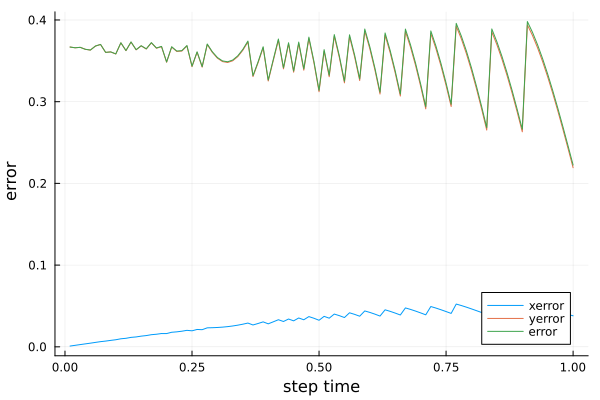

In [80]:
plot(0.01:0.01:1,ErrorLeapfrogCalc[1], label = "xerror")
plot!(0.01:0.01:1,ErrorLeapfrogCalc[2], label = "yerror")
plot!(0.01:0.01:1,ErrorLeapfrogCalc[3],label = "error")

plot!(yaxis = " error", xaxis="step time")


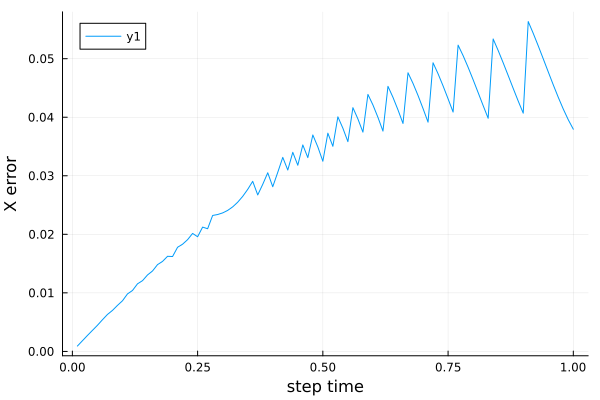

In [68]:
plot(0.01:0.01:1,ErrorLeapfrogCalc[1])

plot!(yaxis = "X error", xaxis="step time")

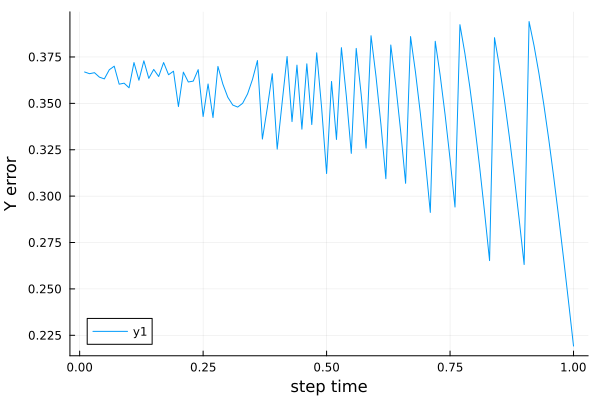

In [69]:
plot(0.01:0.01:1,ErrorLeapfrogCalc[2])

plot!(yaxis = "Y error", xaxis="step time")

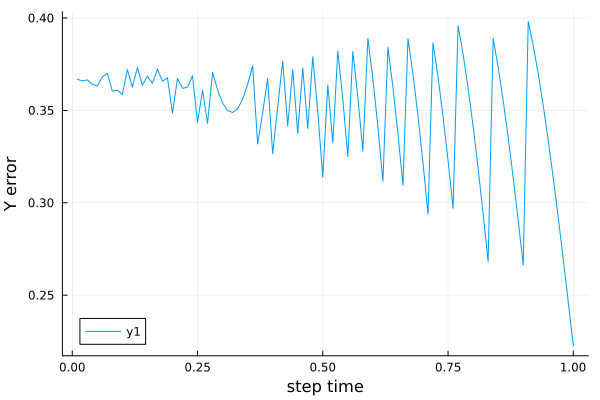

In [75]:
plot(0.01:0.01:1,ErrorLeapfrogCalc[3])

plot!(yaxis = "Y error", xaxis="step time")